# Introduction to Fuzzing
- Fuzz Testing is a type of testing where automated or semi-automated testing techniques are used to discover coding errors and security loopholes in software.
- Fuzz testing was originally developed by Barton Miller at the University of Wisconsin in 1989. Fuzz testing or fuzzing is a Software testing technique, and it is a type of Security Testing.

### Why we do Fuzz testing?
- Fuzz testing is used to check the Vulnerability of software. It is very cost effective testing techniques.
- Fuzz testing is one of the black box testing technique. 
- Fuzzing is one of the most common method hackers used to find vulnerability of the system.
- Fuzz testing gives more effective result when used with Black Box Testing.

source: https://www.guru99.com/fuzz-testing.html


In [283]:
#import all the libraries altogather
from urllib.parse import urlparse
from fuzzingbook.MutationFuzzer import MutationFuzzer
from fuzzingbook.Coverage import Coverage
from fuzzingbook.Coverage import BranchCoverage
from fuzzingbook.Fuzzer import RandomFuzzer
import random
import pandas as pd # data processing, dataframe
import seaborn as sns # attractive vizualization of data representation

import matplotlib.pyplot as plt
%matplotlib inline



# Program: A simple python program that will take a input and check the value is prime or non-prime


In [264]:
def prime_number_program(rawNumber_input):
    # taking input from user
    number = rawNumber_input
    #number = int(rawNumber_input)
    isPrime = False
    # prime number is always greater than 1
    if number > 1:
        for i in range(2, number):
            if (number % i) == 0:
                print(number, "is not a prime number")
                isPrime = False
                break
        else:
            print(number, "is a prime number")
            isPrime = True
            
    # if the entered number is less than or equal to 1
    # then it is not prime number
    else:
        print(number, "is not a prime number")
        isPrime = False
        
    return isPrime


### Conversation problem from 'string' formated input to 'int'
The fuzzer generate_input() will simply generates a random number from (0-9) in string format with a default length between 1 and 20. But the prime number program does not have any checker of integer number of the input or the programmer did not convert the user input into interger before processing for checking prime or non-prime number. Therefore, when the fuzzer provide input in string format then the program throw "not supported between instances of 'str' and 'int'" this message. The developer also did not handle the exception of the program to check instances of 'str' and 'int'

# 1. Random Fuzzer
We test the prime_number_program() with random fuzzer, but the result was not satisfactory because it generate any kind of character that we do not needed because we only need the numeric or integer number. The result show bellow after testing the prime_number_program().

In [284]:
random_fuzzer = RandomFuzzer()
trials = 10
for i in range(0, trials):
    inp = random_fuzzer.fuzz()
    print ("trial: %s with input: %s" % (i, inp))
    try: 
        prime_number_program(inp)
    except ValueError:
        traceback.print_exc()
        break

trial: 0 with input: (8<=+;< 51#"/+:$


TypeError: '>' not supported between instances of 'str' and 'int'

This random fuzzer generate non-integer input to check the prime_number_program() where we need integer number to test the program. So, we try to genreate fuzzed input smartly using this generate_input() function but this function generate numbers with as string format, hence we need to convert before pass to prime_number_program() otherwise it will throw "not supported between instances of 'str' and 'int'" exception. 

### Results: Random Fuzzer (API based calling) with filter
A very very less smarter way to generate fuzzing inputs. Hence, the percentage of generating valid inputs is Zero(0%).

In contrast, after checking the percentage(%) of valid input of randon fuzzer() and we found the percentage of valid inputs exactly zero(0) percent for random fuzzer. Therefore, mutation fuzzer generate the smarter inputs than the random fuzzer. It is notable that the customized mutation fuzzer (e.g., add, delete, flips random character) is generating more valid inputs smartly that we seen in the above result.

In [316]:
random_fuzzer = RandomFuzzer()
trials = 10
valid = 0
for i in range(0, trials):
    inp = random_fuzzer.fuzz()
    print ("trial: %s with input: %s" % (i, inp))
    if inp.isnumeric() == True:
        valid += 1
print("Percentage '(%)' of valid input= ", + valid/trials)

trial: 0 with input: :0:#!$(:0#4"3*9;5,2%';<)'6%2''46.>?!5,33;95(76$5
trial: 1 with input: #6(&#92:/!'?,)%53$/7=&!/$8*(+%9- 85 3-?512 62<96=#"<':%4:4)1!,'$'!9=?"0-69%:+7;-7
trial: 2 with input: 5>,6=20'(>::!57&-4//#%#0"+=$!)(*,426'-1+6/127//,>!:"2(*9
trial: 3 with input: $:/1*+=-0>).&#<$ 3#?.%)*4(6%$!?&"2<"2!(%?25 .&%7><7?>-!16;<-=-33,>47<4(',/&58.,!$-;$"13>-
trial: 4 with input: 79-442<,":>:$4*!%=2-/&'117='*$)%1478);-.&50%1>?!-:+(*1?4
trial: 5 with input: 70%35:1&</* "39+&9!-3">!/1+=51 '#61>>*#%!>3!+>&-+2(&>3"*&#)31$7!7"82
trial: 6 with input: :?/5*55%+9'99-3#,7>*$;99*7=&3$0<5" 7+?',&"1?3(/1;4:8;>-?*=4)0"<>"> *#76+29>9"!6"<42(! &/
trial: 7 with input: 823516#5"?$0*)4>5,=<+/#,;6)%6::?0&189-,&*<:+9=+8"
trial: 8 with input: 6/!!.2!8(?<=>37!/7, &.<0
trial: 9 with input: 5;:+'/+>?677-'=&09#3))&,>1)+:5!7,-&70#6(873+ 6/(5 :-0"!9!!#-" :2<085,9$
Percentage '(%)' of valid input=  0.0


### Generate smarter input with customization

In [285]:
def generate_input():
        string_length = random.randrange(1, 20)
        random_input = ""
        #gerneate number randomly by length 1-20 with digit from 0 to 9 using ascii decimal value of 48-57 
        for i in range(0, string_length):
            random_input += chr(random.randrange(48,57))
                                        
        return random_input

### Test with integer format inputs
Testing prime_number_program() after randomly generating the fuzzed input and converted the random inputs into integer from string. So, during this time the program provided the output accurately without exception because generate_input() function only generate numeric number (string format).  

In [288]:
for i in range(0,10):
    # testing program with 
    random_output = int(generate_input())
    prime_number_program (random_output) 

15 is not a prime number
11685345141634 is not a prime number
35 is not a prime number
5023336672126486 is not a prime number
133523555 is not a prime number
47181673504876 is not a prime number
818831441376428 is not a prime number
68860412574 is not a prime number
231763050833573 is not a prime number
3076561 is not a prime number


### Test with string formated inputs
Testing prime_number_program() after randomly generating the fuzzed input and pass the input to the program 
as the string number. So, during this time the program failed to generate the output and throw exception.

In [287]:
for i in range(0,10):
    prime_number_program (generate_input())   

TypeError: '>' not supported between instances of 'str' and 'int'

# 2. Mutation Fuzzer

We test the prime_number_program() with Mutation fuzzer and in this case, we generate the input smartly because we exclude other kinds of ascii charater except the number characters from 0-9 that have the dedimal value from 48-57 accordingly. This time, we succesfully generated valid input for the targeted program (i.e., prime_number_program()) and the program passed with accurate output. In that case, we developed three python functions such as delete_random_char(), add_random_char() and flip_random_character() to generate more valid inputs using the mutation techniques. These function have been developed bellow:

In [301]:
# the code mutates the input by randomly deleting a character
def delete_random_char(s):
    if s == "":
        return s
    pos = random.randint(0, len(s) - 1)
    return s[:pos] + s[pos+1:]

In [302]:
# the code mutates the input by randomly adding a number from 0-9
def add_random_char(s):
    pos = random.randint(0, len(s) - 1)
    random_character = chr(random.randrange(48, 57))
    return s[:pos] + random_character + s[pos:]

In [303]:
# the code mutates the input by randomly flipping a character
def flip_random_character(s):
    """Returns s with a random bit flipped in a random position"""
    if s == "":
        return s

    pos = random.randint(0, len(s) - 1)
    c = s[pos]
    bit = 1 << random.randint(0, 5)
    new_c = chr(ord(c) ^ bit)
    # print("Flipping", bit, "in", repr(c) + ", giving", repr(new_c))
    return s[:pos] + new_c + s[pos + 1:]

Although this flip_random_character() functions mutate the input, somethimes it generate the non-numeric number using the random.randint(0, 5) function that is not valid input for the prime_number_program() because it generate invalid input and throw exception. 

### Result and comparison: Mutation Fuzzer (non-API based calling)
A smarter way to generate random inputs after Customizing the functions of mutations. lets check the result of valid inputs generation.

In [321]:
inp = "11111"
valid = 0
trials = 10
mutators = [delete_random_char, add_random_char, flip_random_character]
for i in range(0, trials):
    mutator = mutators[random.randint(0, 2)]
    inp = mutator(inp)
    print (inp)
    if inp.isnumeric() == True:
        valid += 1
print("Percentage '(%)' of valid input= ", + valid/trials)    
# after 10 random mutations

111711
111791
1110791
0110791
010791
01091
01093
010)3
810)3
8100)3
Percentage '(%)' of valid input=  0.7


This are the good input generated from the initial input (11111), but if we use "99999999" then this mutation fuzzer will generate few valid inputs. Because the mutator will mutate non-numeric character using randint(0, 5) function. So, lets see bellow code for customized mutation fuzzer.   

In [365]:
inp = "99999999"
valid = 0
trials = 10
mutators = [delete_random_char, add_random_char, flip_random_character]
for i in range(0, trials):
    mutator = mutators[random.randint(0, 2)]
    inp = mutator(inp)
    print (inp)
    if inp.isnumeric() == True:
        valid += 1
print("Percentage '(%)' of valid input= ", + valid/trials)  
# after 10 random mutations

899999999
89999999
8999999
8999998
8999;98
999;98
999;928
999;98
999;698
999;69
Percentage '(%)' of valid input=  0.4


So, this initial input ("99999999") generates more invalid inputs after mutating the initial input, because 9 is the last digit of number in ascii table, so after flipping the character randomly from 0-5 using randint(0, 5) it flip to the other non numeric character. However, it is true that mutation fuzzer generating input in smarter way compared to random fuzzer. But what will happend if we call API from the FuzzingBook for MutationFuzzer() in stead of using the customized mutation fuzzer like above code?

### Results and comparison: Mutation Fuzzer (API based calling)
A less-smarter way to generate random inputs. lets check the result of valid inputs generation and check API of MutationFuzzer(). 

In [351]:
trials = 10
Seed = "99999999"
mutation_fuzzer = MutationFuzzer(seed = [Seed])
population = []
fuzzed_input = ""
valid = 0

for i in range(0, trials):
    fuzzed_input = mutation_fuzzer.fuzz()
    print (fuzzed_input)
    if fuzzed_input.isnumeric() == True:
        valid += 1
print("Percentage '(%)' of valid input= ", + valid/trials)  

99999999
99>Id9K
99999V
999N!91)
998y999
i919
99:9
19H"919y
9=?)89#>9
99999
Percentage '(%)' of valid input=  0.2


#### Here, API based mutation fuzzer can generate 20% valid inputs, whereas non-API based mutation fuzzer can generate maximum 100% valid inputs for the prime number program. 
In terms of improvement, bellow we show how to maximize the valid input into 100%. 

## Improvement
#### From this stage we can generate 100% valid inputs if we do not consider the flips random bit idea or if we more customize the flipping bits idea.
Lets see the results of above code

In [352]:
inp = "99999999"
valid = 0
trials = 10
mutators = [delete_random_char, add_random_char]
for i in range(0, trials):
    mutator = mutators[random.randint(0, 1)]
    inp = mutator(inp)
    print (inp)
    if inp.isnumeric() == True:
        valid += 1
print("Percentage '(%)' of valid input= ", + valid/trials)  
# after 10 random mutations

999929999
9999290999
999290999
9991290999
999120999
99912099
999312099
9993124099
97993124099
979936124099
Percentage '(%)' of valid input=  1.0


#### This API based mutation fuzzer generate very few valid inputs compared to customized (manually developed mutation fuzzer) mutation fuzzer. So, our manually developed mutation fuzzer (customized fuzzer) could be considered a samrt way to generate the inputs using mutation based fuzzer appraoch.

Therefore, we got 100% valid inputs if we do not consider the flipping concepts and this is the one way to generate  valid inputs very smartly. But, <b>Other way</b> would be customizing the randint() function in flip_random_character() function body. But we will keep it same (do not want to change it now) because we want to see the coverage result using invalid inputs that how much it is covering our program and how it is behaving when the program is taking the invalid inputs, hence it would be interesting to see the programs behaviours (e.g., bugs, security, failures).     

##### So, API of mutation fuzzer can generate only 20% valid input compared to customized mutation fuzzer that can generate 70% (maximum 100%) valid input by 10 trials from the above code by same input "11111"

#### Decision
Therefore, for coverage guided fuzzer we will follow our customized (i.e., this is our smarter way to generate valid input) mutation (e.g., add, delete, flips random character). However, we can generate our inputs more smartly using customized mutation after changing the flip_random_character() function where it using the randint().      

# 3. Mutation-Based Coverage Fuzzer

Lets test the prime number program and calculated their line and branch coverage using mutation fuzzer.

### Line coverage (prime number program) : non-API based mutation fuzzer
We stored coverage information in DataFrame (i.e., dfLineCoveragePrime for line coverage) when we found a new seeds that increased the coverage for line coverage. We also maintain the array[] list to store the coverage result for both line coverage. We developed python function (i.e., calculate_cumulative_line_coverage_prime()) for recording the coverage scores of line coverage. This calculate_cumulative_line_coverage_prime() function are implemented bellow:


In [470]:
dfLineCoveragePrime = pd.DataFrame(columns=['Seed', 'TrialNo', 'Prime_LineCoverageScore'])
cumulative_Line_coverage_Prime = []
def calculate_cumulative_line_coverage_prime(input_population, prime_number_program):
    global dfLineCoveragePrime
    dfLineCoveragePrime = pd.DataFrame()
    global cumulative_Line_coverage_Prime 
    cumulative_Line_coverage_Prime = []
    all_coverage = set()
    beforeUnion = 0
    afterUnion = 0
    trialNo = 0
    #line coverage section
    for inp in input_population:
        with Coverage() as lineCov:
            try:
                prime_number_program(int(inp)) # this is the program we are testing using the mutationFuzzer()
            except:
                #pass
                raise ValueError("We found exception from this input: ", +inp)
        
        trialNo +=1
        # set union to get the increased coverage number for next seed
        beforeUnion = len(all_coverage)
        all_coverage = all_coverage.union(lineCov.coverage())
        afterUnion = len(all_coverage)  
        #print(afterUnion, beforeUnion)  
        if(afterUnion > beforeUnion):
            #print("after:" +inp)
            cumulative_Line_coverage_Prime.append(len(all_coverage))
            dfLineCoveragePrime = dfLineCoveragePrime.append({'Seed': inp, 'TrialNo': trialNo, 'Prime_LineCoverageScore': afterUnion}, 
                                                   ignore_index=True) 
            
    return cumulative_Line_coverage_Prime

In [471]:
trials = 2000
Seed = "1119"
mutators = [delete_random_char, add_random_char, flip_random_character]
population = []
for i in range(0, trials):
    mutator = mutators[random.randint(0, 2)]
    fuzzed_input = mutator(Seed)
    if fuzzed_input.isnumeric() == True:
        #print(fuzzed_input)
        population.append(fuzzed_input)
    
cumulative_Line_coverage_Prime = calculate_cumulative_line_coverage_prime(population, prime_number_program)


14119 is not a prime number
11169 is not a prime number
119 is not a prime number
11119 is a prime number
1159 is not a prime number
119 is not a prime number
111 is not a prime number
111 is not a prime number
119 is not a prime number
119 is not a prime number
17119 is not a prime number
119 is not a prime number
61119 is not a prime number
119 is not a prime number
11189 is not a prime number
41119 is not a prime number
11179 is not a prime number
119 is not a prime number
11819 is not a prime number
18119 is a prime number
5119 is a prime number
119 is not a prime number
119 is not a prime number
1109 is a prime number
119 is not a prime number
12119 is a prime number
11419 is not a prime number
3119 is a prime number
11119 is a prime number
111 is not a prime number
111 is not a prime number
81119 is a prime number
111 is not a prime number
18119 is a prime number
111 is not a prime number
15119 is not a prime number
11179 is not a prime number
119 is not a prime number
11019 is n

81119 is a prime number
119 is not a prime number
119 is not a prime number
111 is not a prime number
11139 is not a prime number
1519 is not a prime number
11119 is a prime number
12119 is a prime number
119 is not a prime number
15119 is not a prime number
111 is not a prime number
111 is not a prime number
111 is not a prime number
111 is not a prime number
119 is not a prime number
111 is not a prime number
1919 is not a prime number
11519 is a prime number
119 is not a prime number
1519 is not a prime number
119 is not a prime number
1019 is a prime number
31119 is not a prime number
11139 is not a prime number
1919 is not a prime number
119 is not a prime number
11189 is not a prime number
16119 is not a prime number
61119 is not a prime number
11819 is not a prime number
1119 is not a prime number
1139 is not a prime number
1159 is not a prime number
1319 is a prime number
18119 is a prime number
3119 is a prime number
11119 is a prime number
11019 is not a prime number
111 is n

81119 is a prime number
11719 is a prime number
1019 is a prime number
111 is not a prime number
119 is not a prime number
119 is not a prime number
11019 is not a prime number
1159 is not a prime number
111 is not a prime number
11119 is a prime number
111 is not a prime number
11189 is not a prime number
119 is not a prime number
119 is not a prime number
11189 is not a prime number
14119 is not a prime number
1111 is not a prime number
1319 is a prime number
119 is not a prime number
12119 is a prime number
1119 is not a prime number
119 is not a prime number
119 is not a prime number
1111 is not a prime number
111 is not a prime number
11189 is not a prime number
11519 is a prime number
119 is not a prime number
119 is not a prime number
111 is not a prime number
11189 is not a prime number
119 is not a prime number
119 is not a prime number
1111 is not a prime number
41119 is not a prime number
119 is not a prime number
12119 is a prime number
1139 is not a prime number
1319 is a 

119 is not a prime number
119 is not a prime number
119 is not a prime number
119 is not a prime number
111 is not a prime number
11129 is not a prime number
111 is not a prime number
11139 is not a prime number
119 is not a prime number
11619 is not a prime number
11129 is not a prime number
119 is not a prime number
111 is not a prime number
1111 is not a prime number
31119 is not a prime number
1519 is not a prime number
11189 is not a prime number
11179 is not a prime number
11419 is not a prime number
16119 is not a prime number
119 is not a prime number
21119 is not a prime number
111 is not a prime number
71119 is a prime number
17119 is not a prime number
11129 is not a prime number
119 is not a prime number
14119 is not a prime number
11159 is a prime number
119 is not a prime number
11139 is not a prime number
31119 is not a prime number
11149 is a prime number
111 is not a prime number
11719 is a prime number
111 is not a prime number
11119 is a prime number
119 is not a pri

11519 is a prime number
17119 is not a prime number
12119 is a prime number
1111 is not a prime number
119 is not a prime number
1109 is a prime number
1199 is not a prime number
119 is not a prime number
119 is not a prime number
17119 is not a prime number
1519 is not a prime number
111 is not a prime number
13119 is not a prime number
1119 is not a prime number
119 is not a prime number
16119 is not a prime number
1139 is not a prime number
1159 is not a prime number
111 is not a prime number
11189 is not a prime number
119 is not a prime number
10119 is not a prime number
1019 is a prime number
11129 is not a prime number
119 is not a prime number
5119 is a prime number
119 is not a prime number
11119 is a prime number
51119 is not a prime number
119 is not a prime number
1119 is not a prime number
1319 is a prime number
1519 is not a prime number
1199 is not a prime number
119 is not a prime number
1919 is not a prime number
119 is not a prime number
41119 is not a prime number
11

81119 is a prime number
1119 is not a prime number
11189 is not a prime number
1199 is not a prime number
119 is not a prime number
61119 is not a prime number
71119 is a prime number
11159 is a prime number


In [472]:
dfLineCoveragePrime

,Prime_LineCoverageScore,Seed,TrialNo
0,40.0,14119,1.0
1,42.0,11119,4.0


Text(0, 0.5, 'Lines covered')

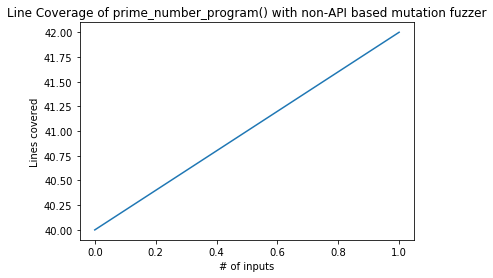

In [478]:
plt.plot(cumulative_Line_coverage_Prime)
plt.title('Line Coverage of prime_number_program() with non-API based mutation fuzzer')
plt.xlabel('# of inputs')
plt.ylabel('Lines covered')

### Branch coverage (prime number program): non-API based mutation fuzzer
We stored coverage information in DataFrame (i.e., dfBranchCoveragePrime for branch coverage) when we found a new seeds that increased the coverage for branch coverage. We also maintain the array[] list to store the coverage result for both line and branch coverage. We developed python function (i.e., calculate_cumulative_branch_coverage_prime()) for recording the coverage scores of branch coverage. This calculate_cumulative_branch_coverage_prime() function are implemented bellow:

In [474]:
dfBranchCoveragePrime = pd.DataFrame(columns=['Seed', 'TrialNo', 'Prime_BranchCoverageScore'])
cumulative_branch_coverage_Prime = []
def calculate_cumulative_branch_coverage_prime(input_population, prime_number_program):
    global dfBranchCoveragePrime
    dfBranchCoveragePrime = pd.DataFrame()
    global cumulative_branch_coverage_Prime 
    cumulative_branch_coverage_Prime = []
    all_coverage = set()
    beforeUnion = 0
    afterUnion = 0
    trialNo = 0
    #line coverage section
    for inp in input_population:
        with BranchCoverage() as branchCov:
            try:
                prime_number_program(int(inp)) # this is the program we are testing using the mutationFuzzer()
            except:
                #pass
                raise ValueError("We found exception from this input: ", +inp)
        
        trialNo +=1
        # set union to get the increased coverage number for next seed
        beforeUnion = len(all_coverage)
        all_coverage = all_coverage.union(branchCov.coverage())
        afterUnion = len(all_coverage)  
        #print(afterUnion, beforeUnion)  
        if(afterUnion > beforeUnion):
            #print("after:" +inp)
            cumulative_branch_coverage_Prime.append(len(all_coverage))
            dfBranchCoveragePrime = dfBranchCoveragePrime.append({'Seed': inp, 'TrialNo': trialNo, 'Prime_BranchCoverageScore': afterUnion}, 
                                                   ignore_index=True) 
            
    return cumulative_branch_coverage_Prime


In [475]:
trials = 2000
Seed = "1119"
mutators = [delete_random_char, add_random_char, flip_random_character]
population = []
for i in range(0, trials):
    mutator = mutators[random.randint(0, 2)]
    fuzzed_input = mutator(Seed)
    if fuzzed_input.isnumeric() == True:
        #print(fuzzed_input)
        population.append(fuzzed_input)
    
cumulative_branch_coverage_Prime = calculate_cumulative_branch_coverage_prime(population, prime_number_program)


11719 is a prime number
119 is not a prime number
1109 is a prime number
111 is not a prime number
11189 is not a prime number
1118 is not a prime number
11189 is not a prime number
119 is not a prime number
111 is not a prime number
18119 is a prime number
119 is not a prime number
119 is not a prime number
18119 is a prime number
119 is not a prime number
17119 is not a prime number
1109 is a prime number
1919 is not a prime number
119 is not a prime number
119 is not a prime number
15119 is not a prime number
119 is not a prime number
12119 is a prime number
119 is not a prime number
11109 is not a prime number
111 is not a prime number
11169 is not a prime number
1019 is a prime number
119 is not a prime number
119 is not a prime number
119 is not a prime number
9119 is not a prime number
119 is not a prime number
119 is not a prime number
1109 is a prime number
119 is not a prime number
119 is not a prime number
1199 is not a prime number
119 is not a prime number
1118 is not a pr

21119 is not a prime number
111 is not a prime number
119 is not a prime number
1519 is not a prime number
17119 is not a prime number
31119 is not a prime number
119 is not a prime number
1119 is not a prime number
3119 is a prime number
11189 is not a prime number
11119 is a prime number
1111 is not a prime number
1519 is not a prime number
15119 is not a prime number
3119 is a prime number
1118 is not a prime number
9119 is not a prime number
119 is not a prime number
11109 is not a prime number
119 is not a prime number
11619 is not a prime number
119 is not a prime number
1139 is not a prime number
119 is not a prime number
71119 is a prime number
119 is not a prime number
119 is not a prime number
11019 is not a prime number
18119 is a prime number
119 is not a prime number
111 is not a prime number
31119 is not a prime number
1159 is not a prime number
11149 is a prime number
1139 is not a prime number
119 is not a prime number
119 is not a prime number
17119 is not a prime numb

11519 is a prime number
119 is not a prime number
119 is not a prime number
119 is not a prime number
111 is not a prime number
11119 is a prime number
119 is not a prime number
1199 is not a prime number
1119 is not a prime number
1119 is not a prime number
119 is not a prime number
3119 is a prime number
15119 is not a prime number
119 is not a prime number
119 is not a prime number
111 is not a prime number
119 is not a prime number
1139 is not a prime number
119 is not a prime number
1109 is a prime number
12119 is a prime number
1919 is not a prime number
1139 is not a prime number
119 is not a prime number
15119 is not a prime number
61119 is not a prime number
21119 is not a prime number
119 is not a prime number
11119 is a prime number
11129 is not a prime number
11019 is not a prime number
1919 is not a prime number
51119 is not a prime number
119 is not a prime number
1109 is a prime number
119 is not a prime number
11119 is a prime number
11719 is a prime number
1919 is not 

81119 is a prime number
119 is not a prime number
71119 is a prime number
9119 is not a prime number
1519 is not a prime number
11119 is a prime number
1118 is not a prime number
11819 is not a prime number
119 is not a prime number
16119 is not a prime number
119 is not a prime number
81119 is a prime number
9119 is not a prime number
111 is not a prime number
119 is not a prime number
119 is not a prime number
5119 is a prime number
119 is not a prime number
3119 is a prime number
1319 is a prime number
11719 is a prime number
1118 is not a prime number
11219 is not a prime number
1139 is not a prime number
11109 is not a prime number
119 is not a prime number
41119 is not a prime number
119 is not a prime number
11119 is a prime number
11179 is not a prime number
1119 is not a prime number
11159 is a prime number
119 is not a prime number
51119 is not a prime number
15119 is not a prime number
119 is not a prime number
11019 is not a prime number
119 is not a prime number
1109 is a 

11149 is a prime number
11109 is not a prime number
11019 is not a prime number
1519 is not a prime number
3119 is a prime number
11719 is a prime number
119 is not a prime number
11179 is not a prime number
119 is not a prime number
3119 is a prime number
11419 is not a prime number
119 is not a prime number
11219 is not a prime number
1109 is a prime number
119 is not a prime number
11159 is a prime number
119 is not a prime number
111 is not a prime number
1319 is a prime number
1519 is not a prime number
11819 is not a prime number
1139 is not a prime number
51119 is not a prime number
119 is not a prime number
111 is not a prime number
11189 is not a prime number
11619 is not a prime number
17119 is not a prime number
31119 is not a prime number
41119 is not a prime number
119 is not a prime number
15119 is not a prime number
11139 is not a prime number
119 is not a prime number
119 is not a prime number
119 is not a prime number
11129 is not a prime number
5119 is a prime number


In [476]:
dfBranchCoveragePrime

,Prime_BranchCoverageScore,Seed,TrialNo
0,42.0,11719,1.0
1,47.0,119,2.0
2,48.0,31119,847.0


Text(0, 0.5, 'Branch covered')

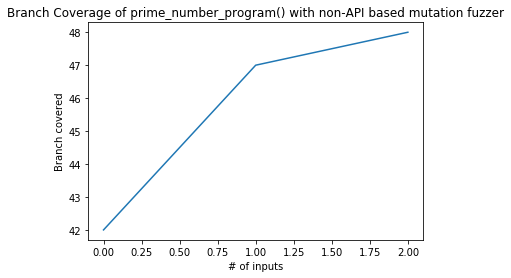

In [479]:
plt.plot(cumulative_branch_coverage_Prime)
plt.title('Branch Coverage of prime_number_program() with non-API based mutation fuzzer')
plt.xlabel('# of inputs')
plt.ylabel('Branch covered')

### Line and Branch Coverage (prime number program): API-based mutation fuzzer()
We also check the coverage for the API-based mutation fuzzer and in that case we filter numeric and non-numeric inputs. But if we do not filter the input we would not be able to run or test the prime number program because it will throw exception. We record the line coverage score is maximum 42 for non-API based mutation fuzzer and maximum 44 for the API-based mutation fuzzer. For branch coverage, we got more branch coverage (max-51) from API-based mutation fuzzer compared to non-API based mutation fuzzer (custmized mutation fuzzer) that is maximum 48 for 2000 trials. 

In [482]:
trials = 2000
Seed = "1119"
fuzzed_input = ""
mutation_fuzzer = MutationFuzzer(seed = [Seed])
population = []
for i in range(0, trials):
    fuzzed_input = mutation_fuzzer.fuzz()
    if fuzzed_input.isnumeric() == True:
        #print(fuzzed_input)
        population.append(fuzzed_input)
    
cumulative_branch_coverage_Prime_API = calculate_cumulative_branch_coverage_prime(population, prime_number_program)
cumulative_line_coverage_Prime_API = calculate_cumulative_line_coverage_prime(population, prime_number_program)

1119 is not a prime number
11 is a prime number
9 is not a prime number
1158 is not a prime number
19 is a prime number
118 is not a prime number
91139 is a prime number
11 is a prime number
911 is a prime number
179 is a prime number
4 is not a prime number
11 is a prime number
91198 is not a prime number
13 is a prime number
5319 is not a prime number
3111 is not a prime number
819 is not a prime number
1119 is not a prime number
190 is not a prime number
111 is not a prime number
11 is a prime number
19 is a prime number
9 is not a prime number
39 is not a prime number
18 is not a prime number
81119 is a prime number
11 is a prime number
119 is not a prime number
119 is not a prime number
1 is not a prime number
1190 is not a prime number
1329 is not a prime number
181 is a prime number
1 is not a prime number
1 is not a prime number
16 is not a prime number
9 is not a prime number
1519 is not a prime number
8 is not a prime number
5 is a prime number
100 is not a prime number
111 i

In [484]:
dfLineCoveragePrime

,Prime_LineCoverageScore,Seed,TrialNo
0,37.0,1119,1.0
1,39.0,11,2.0
2,42.0,91139,7.0
3,44.0,1,30.0


Text(0, 0.5, 'Lines covered')

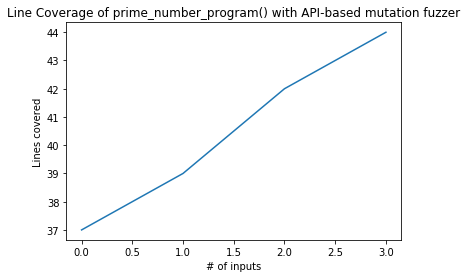

In [488]:
plt.plot(cumulative_line_coverage_Prime_API)
plt.title('Line Coverage of prime_number_program() with API-based mutation fuzzer')
plt.xlabel('# of inputs')
plt.ylabel('Lines covered')

In [486]:
dfBranchCoveragePrime

,Prime_BranchCoverageScore,Seed,TrialNo
0,43.0,1119,1.0
1,47.0,11,2.0
2,51.0,1,30.0


Text(0, 0.5, 'Branch covered')

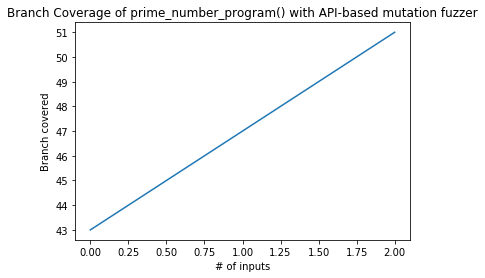

In [487]:
plt.plot(cumulative_branch_coverage_Prime_API)
plt.title('Branch Coverage of prime_number_program() with API-based mutation fuzzer')
plt.xlabel('# of inputs')
plt.ylabel('Branch covered')

### Failure found in prime_number_program()
#### During branch coverage and line coverage, when we use flip_random_character() function for generating the mutation fuzzer, we did not consider isnumeric() method to check the inputs. Therefore, inputs created as non-numeric, hence the program failed to execute for non-numeric input after fuzzing. 
Lets see the same things how the program crash when passing the non-numeric input generated by mutation fuzzer to the prime_number_program().  

In [447]:
trials = 2000
Seed = "1119"
mutators = [delete_random_char, add_random_char, flip_random_character]
population = []
for i in range(0, trials):
    mutator = mutators[random.randint(0, 2)]
    fuzzed_input = mutator(Seed)
    # HERE WE IGNORE TO CHECK THE NUMERIC VALUE FOR THE CREATING THE GENERATION
    """HERE WE IGNORE TO CHECK THE NUMERIC VALUE AS INPUTS FOR CREATING THE GENERATION"""
    #if fuzzed_input.isnumeric() == True:
        #print(fuzzed_input)
    population.append(fuzzed_input)
    
cumulative_branch_coverage_Prime = calculate_cumulative_branch_coverage_prime(population, prime_number_program)


1199 is not a prime number
5119 is a prime number
1159 is not a prime number
9119 is not a prime number


TypeError: bad operand type for unary +: 'str'

### Test URL parser Program
#### This is the program that covered in the class.  We also extend this simple URL parser program using mutation-based fuzzing. We will test this program and record the line and branch coverage and store the score into the data frame.  
Here we use the mutation fuzzer to generate the inputs in the smarter way, although its generate lots of invalid inputs during the mutation but compared to random fuzzer and mutation fuzzer (i.e.,customized way- non API based mutation fuzzer) its generating smart inputs for the URL parser program. Lets the code bellow how we are coveraging line and branch: 

In [123]:
def http_program(url):
    supported_schemes = ["http", "https"]
    result = urlparse(url)
    if result.scheme not in supported_schemes:
        raise ValueError("Scheme must be one of " + repr(supported_schemes))
    if result.netloc == '':
        raise ValueError("Host must be non-empty")

    # Do something with the URL
    return True  

Here in this program the URL follow this format to parse by URL parser : scheme://netloc/path?query#fragment

where <i>scheme</i> is the protocol to be used, including http, https, ftp, file,
netloc is the name of the host to connect to, such as www.google.com,
path is the path on that very host, such as search,
query is a list of key/value pairs, such as q=fuzzing,
fragment is a marker for a location in the retrieved document, such as #result

Source: https://www.fuzzingbook.org/

In [133]:
def is_valid_url(url):
    try:
        result = http_program(url)
        return True
    except ValueError:
        return False

### Line Coverage (URL Parser program)
We stored coverage information in DataFrame (i.e., dfLineCoverage for line coverage) when we found a new seeds that increased the coverage for line. We also maintain the array[] list to store the coverage result for line coverage. We developed python function (i.e., calculate_cumulative_line_coverage()) for recording the coverage scores of line coverage. This calculate_cumulative_line_coverage() function is implemented bellow:

In [162]:
dfLineCoverage = pd.DataFrame(columns=['Seed', 'TrialNo', 'LineCoverageScore'])
cumulative_Line_coverage = []
def calculate_cumulative_line_coverage(input_population, is_valid_url):
    global dfLineCoverage
    dfLineCoverage = pd.DataFrame()
    global cumulative_Line_coverage 
    cumulative_Line_coverage = []
    all_coverage = set()
    beforeUnion = 0
    afterUnion = 0
    trialNo = 0
    #line coverage section
    for inp in input_population:
        with Coverage() as lineCov:
            try:
                is_valid_url(inp) # this is the program we are testing using the mutationFuzzer()
            except:
                raise ValueError("We found exception from this input: ", +inp)
        
        trialNo +=1
        # set union to get the increased coverage number for next seed
        beforeUnion = len(all_coverage)
        all_coverage = all_coverage.union(lineCov.coverage())
        afterUnion = len(all_coverage)  
        #print(afterUnion, beforeUnion)  
        if(afterUnion > beforeUnion):
            #print("after:" +inp)
            cumulative_Line_coverage.append(len(all_coverage))
            dfLineCoverage = dfLineCoverage.append({'Seed': inp, 'TrialNo': trialNo, 'LineCoverageScore': afterUnion}, 
                                                   ignore_index=True) 
            
    return cumulative_Line_coverage



### Branch Coverage (URL parser)

We stored coverage information in DataFrame (i.e., dfBranchCoverage for branch coverage), when we found a new seeds that increased the coverage for branch coverage. We also maintain the array[] list to store the coverage result for branch coverage. We developed a python function (i.e., calculate_cumulative_branch_coverage()) for recording the coverage scores of branch coverage. This calculate_cumulative_branch_coverage() function is implemented bellow:

In [170]:
dfBranchCoverage = pd.DataFrame(columns=['Seed', 'TrialNo', 'BranchCoverageScore'])
cumulative_Branch_coverage = []
def calculate_cumulative_branch_coverage(input_population, is_valid_url):
    global dfBranchCoverage
    dfBranchCoverage = pd.DataFrame()
    global cumulative_Branch_coverage 
    cumulative_Branch_coverage = []
    all_coverage = set()
    beforeUnion = 0
    afterUnion = 0
    trialNo = 0
    
    for inp in input_population:
        #Branch coverage section
        with BranchCoverage() as branchCov:
            try:
                is_valid_url(inp) # this is the program we are testing using the mutationFuzzer()
            except:
                raise ValueError("We found exception from this input: ", +inp)
        
        trialNo +=1
        # set union to get the increased coverage number for next seed
        beforeUnion = len(all_coverage)
        all_coverage = all_coverage.union(branchCov.coverage())
        afterUnion = len(all_coverage)  
        #print(afterUnion, beforeUnion)  
        if(afterUnion > beforeUnion):
            #print("after:" +inp)
            cumulative_Branch_coverage.append(len(all_coverage))
            dfBranchCoverage = dfBranchCoverage.append({'Seed': inp, 'TrialNo': trialNo, 
                                                        'BranchCoverageScore': afterUnion}, ignore_index=True)
            
    return cumulative_Branch_coverage

### Coverage results (Line + Branch Coverage)
We take a seed from the population and fuzzing the seed to test the program the and we also take the seed from the population semi-randomly. We also stored the new input, if the new input increased the coverage, and ssign a score to the seed (i.e., how much coverage it improved) in the testing. So, here is the result of this program using mutation based coverage for both line and branch.

In [254]:
trials = 100000
newSeed = "http://www.google.com/search?q=fuzzing"
mutation_fuzzer = MutationFuzzer(seed = [newSeed])
population = []
fuzzedURL = ""

for i in range(0, trials):
    fuzzedURL = mutation_fuzzer.fuzz()
    population.append(fuzzedURL)

cumulative_Line_coverage = calculate_cumulative_line_coverage(population, is_valid_url)
cumulative_Branch_coverage = calculate_cumulative_branch_coverage(population, is_valid_url)

In [255]:
dfLineCoverage

,LineCoverageScore,Seed,TrialNo
0,53.0,http://www.google.com/search?q=fuzzing,1.0
1,64.0,http2/www/google.comO/search?q=fuzzing,2.0
2,70.0,h7ttp:/ww.gngle.co/search?qfuzzng,3.0
3,71.0,http:/www.googl%.cSom+search?fuzzing,4.0
4,76.0,http://www.google.com/se;arch?q=fuzzig-,5.0
5,79.0,Ihttp://wwwggoge.com/search?q=fuzzing,6.0
6,82.0,htt:/$wws.googe.com/search?q!=fumjing,12.0
7,83.0,h|tp://wwg.google.jcom.search?q=fuzzing,15.0
8,84.0,http>/www.oogle.gom/sear#hq=[fuzzinf,45.0
9,85.0,hot;tp//www.goge.ckm/searc?q=fuzjing,71.0


Text(0, 0.5, 'lines covered')

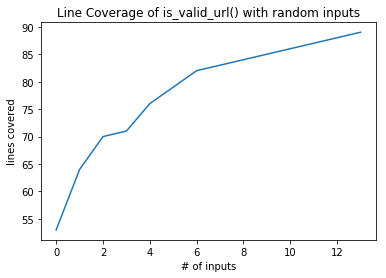

In [256]:
plt.plot(cumulative_Line_coverage)
plt.title('Line Coverage of is_valid_url() with random inputs')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

In [257]:
dfBranchCoverage

,BranchCoverageScore,Seed,TrialNo
0,58.0,http://www.google.com/search?q=fuzzing,1.0
1,73.0,http2/www/google.comO/search?q=fuzzing,2.0
2,81.0,h7ttp:/ww.gngle.co/search?qfuzzng,3.0
3,84.0,http:/www.googl%.cSom+search?fuzzing,4.0
4,90.0,http://www.google.com/se;arch?q=fuzzig-,5.0
5,95.0,Ihttp://wwwggoge.com/search?q=fuzzing,6.0
6,99.0,http:/www.woogecom/search?Aq=fSuzzing,9.0
7,101.0,h|tp://wwg.google.jcom.search?q=fuzzing,15.0
8,102.0,http:/www.gooolecom/searh;q=duzing,19.0
9,103.0,hXttp:/www.Vgooglencom/erchq=f5zzilg,43.0


Text(0, 0.5, 'Branch covered')

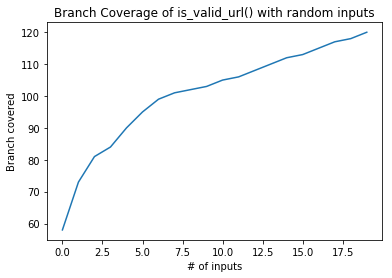

In [289]:
plt.plot(cumulative_Branch_coverage)
plt.title('Branch Coverage of is_valid_url() with random inputs')
plt.xlabel('# of inputs')
plt.ylabel('Branch covered')

## Discussion 
### Random fuzzer() Vs mutation based coverage-guided fuzzer()
In terms of generating inputs, Random fuzzer is not a good approach to generate smarter inputs because it always generate the invalid inputs. Therefore, the percentage of the valid input generation is 0%. On the other hand, API based mutation fuzzer could be good approach because it can generate maximum 40% valid inputs. However, in terms of our prime number program, if we customize or follow non-API based mutation fuzzer by considering three customized (i.e., use only number from ascii character from decimal value 48 to 57) program delete_random_char(), add_random_char(), flip_random_character() then we can generate maximum 70% of valid inputs. However, we can make more improvement (100%) if we do not consider this flip_random_character() function or if we customize more flip_random_character() function because this function use randint() built-in function, therefore 9 is the last digit of number in ascii table, so after flipping the character randomly from 0-5 using randint(0, 5) it flip to the other non numeric character and completely make non-numeric input as a whole.      

In terms of coverage, if we would try to do line and branch coverager with the purely random fuzzer then the program promtly crashed because random fuzzer could not generate valid inputs as a whole. So we tried to focus on the mutation fuzzer with API-based calling and non API-based calling (that means we customize the fuzzer by adding, deleting and flipping a character from the inputs). In terms of line coverage, We record the score of line coverage is maximum 42 for non-API based mutation fuzzer and maximum 44 for the API-based mutation fuzzer. For branch coverage, we got more branch coverage (max-51) from API-based mutation fuzzer compared to non-API based mutation fuzzer (custmized mutation fuzzer) that is maximum 48 for 2000 trials. In conclution, API-based mutation fuzzer inputs are covering more line and branch compared to non-API based mutation fuzzer inputs. 
